Python libraries

In [116]:
#load necessary python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from transformers import BertTokenizer, BertModel
import torch
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, classification_report, roc_curve, auc

Load the fake news dataset

In [2]:
#making data frame to read fake news dataset
fake_news_data = pd.read_csv("Fake.csv")
fake_news_data.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [3]:
#detect shape of the data
fake_news_data.shape

(23481, 4)

In [4]:
#add label column to the data
fake_news_data = fake_news_data.assign(label= 'fake')
fake_news_data.tail(15)

,title,text,subject,date,label
23466,Boston Brakes? How to Hack a New Car With Your...,21st Century Wire says For those who still ref...,Middle-east,"January 22, 2016",fake
23467,Oregon Governor Says Feds ‘Must Act’ Against P...,"21st Century Wire says So far, after nearly 20...",Middle-east,"January 21, 2016",fake
23468,Ron Paul on Burns Oregon Standoff and Jury Nul...,21st Century Wire says If you ve been followin...,Middle-east,"January 21, 2016",fake
23469,BOILER ROOM: As the Frogs Slowly Boil – EP #40,Tune in to the Alternate Current Radio Network...,Middle-east,"January 20, 2016",fake
23470,Arizona Rancher Protesting in Oregon is Target...,RTOne of the most visible members of the armed...,Middle-east,"January 20, 2016",fake
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",fake
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",fake
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",fake
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",fake
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",fake


In [5]:
#define structure of data attributes
fake_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  object
dtypes: object(5)
memory usage: 917.4+ KB


Load the true news dataset

In [6]:
#making data frame to read fake news dataset
true_news_data = pd.read_csv("True.csv")
true_news_data.head(15)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [7]:
#detect data dimension
true_news_data.shape

(21417, 4)

In [8]:
#add label column to the data
true_news_data = true_news_data.assign(label= 'true')
true_news_data.tail(15)

,title,text,subject,date,label
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",true
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",true
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",true
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",true
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",true
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",true
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",true


In [9]:
#define structure of data attributes
true_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB


Merge two datasets

In [10]:
#merge two datasets
news_dataset = pd.concat([fake_news_data, true_news_data], ignore_index=True)
news_dataset.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fake


In [11]:
#display botton features of the dataset
news_dataset.tail(10)

,title,text,subject,date,label
44888,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",true
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44890,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44891,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",true
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",true
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


Data cleaning

In [12]:
#check for null arguments
news_dataset.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [13]:
#detect data duplicates
news_dataset.duplicated().sum()

209

In [14]:
#remove duplicate values
news_data_modified = news_dataset.drop_duplicates()

In [15]:
news_data_modified.duplicated().sum()

0

In [16]:
news_data_modified.shape

(44689, 5)

Text classification

In [17]:
#downlaod stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
#removing stopwords
def clean_text(text):

    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub('\d+', '', text)

    stopwords = set(nltk.corpus.stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.lower() not in stopwords]
    cleaned_text = ' '.join(words)

    return cleaned_text


news_data_modified['title'] = news_data_modified['title'].apply(clean_text)
news_data_modified['text'] = news_data_modified['text'].apply(clean_text)

news_data_modified.head(15)

<ipython-input-18-a8a6ae85c02e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data_modified['title'] = news_data_modified['title'].apply(clean_text)
<ipython-input-18-a8a6ae85c02e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data_modified['text'] = news_data_modified['text'].apply(clean_text)


,title,text,subject,date,label
0,donald trump sends embarrassing new year ’ eve...,donald trump wish americans happy new year lea...,News,"December 31, 2017",fake
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,"December 31, 2017",fake
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017",fake
3,trump obsessed even obama ’ name coded website...,christmas day donald trump announced would bac...,News,"December 29, 2017",fake
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,News,"December 25, 2017",fake
5,racist alabama cops brutalize black boy handcu...,number cases cops brutalizing killing people c...,News,"December 25, 2017",fake
6,fresh golf course trump lashes fbi deputy dire...,donald trump spent good portion day golf club ...,News,"December 23, 2017",fake
7,trump said insanely racist stuff inside oval o...,wake yet another court decision derailed donal...,News,"December 23, 2017",fake
8,former cia director slams trump un bullying op...,many people raised alarm regarding fact donald...,News,"December 22, 2017",fake
9,watch brandnew protrump ad features much kissi...,might thought get break watching people kiss d...,News,"December 21, 2017",fake


In [19]:
#removing lower cases
def lowercase(text):

    text = text.lower()

    text = ''.join([char for char in text if char not in string.punctuation])

    text = re.sub('\d+', '', text)
    stopwords = set(nltk.corpus.stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.lower() not in stopwords]
    cleaned_text = ' '.join(words)

    return cleaned_text

news_data_modified['title'] = news_data_modified['title'].apply(lowercase)
news_data_modified['text'] = news_data_modified['text'].apply(lowercase)

news_data_modified.head(15)

<ipython-input-19-f21cb328e8b5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data_modified['title'] = news_data_modified['title'].apply(lowercase)
<ipython-input-19-f21cb328e8b5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data_modified['text'] = news_data_modified['text'].apply(lowercase)


,title,text,subject,date,label
0,donald trump sends embarrassing new year ’ eve...,donald trump wish americans happy new year lea...,News,"December 31, 2017",fake
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,"December 31, 2017",fake
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017",fake
3,trump obsessed even obama ’ name coded website...,christmas day donald trump announced would bac...,News,"December 29, 2017",fake
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,News,"December 25, 2017",fake
5,racist alabama cops brutalize black boy handcu...,number cases cops brutalizing killing people c...,News,"December 25, 2017",fake
6,fresh golf course trump lashes fbi deputy dire...,donald trump spent good portion day golf club ...,News,"December 23, 2017",fake
7,trump said insanely racist stuff inside oval o...,wake yet another court decision derailed donal...,News,"December 23, 2017",fake
8,former cia director slams trump un bullying op...,many people raised alarm regarding fact donald...,News,"December 22, 2017",fake
9,watch brandnew protrump ad features much kissi...,might thought get break watching people kiss d...,News,"December 21, 2017",fake


In [20]:
#word vectorisation
vectorizer_title = CountVectorizer(analyzer='word', stop_words='english')
word_vectors_title = vectorizer_title.fit_transform(news_data_modified['title'])
print("Word Vectors for Title:")
print(word_vectors_title)

Word Vectors for Title:
  (0, 5924)	1
  (0, 20480)	1
  (0, 17729)	1
  (0, 6459)	1
  (0, 13278)	1
  (0, 22199)	1
  (0, 6844)	1
  (0, 12440)	1
  (0, 5808)	1
  (1, 20480)	1
  (1, 6130)	1
  (1, 2424)	1
  (1, 18858)	1
  (1, 18920)	1
  (1, 17153)	1
  (1, 3818)	1
  (1, 10400)	1
  (2, 17942)	1
  (2, 4898)	1
  (2, 3569)	1
  (2, 10331)	1
  (2, 10729)	1
  (2, 19988)	1
  (2, 14848)	1
  (2, 14475)	1
  :	:
  (44684, 1014)	1
  (44684, 1478)	1
  (44684, 324)	1
  (44685, 12121)	1
  (44685, 3426)	1
  (44685, 15343)	1
  (44685, 22008)	1
  (44685, 11470)	1
  (44686, 1353)	1
  (44686, 4722)	1
  (44686, 9655)	1
  (44686, 12620)	1
  (44687, 14920)	1
  (44687, 8040)	1
  (44687, 17142)	1
  (44687, 14974)	1
  (44687, 21262)	1
  (44687, 21459)	1
  (44687, 21081)	1
  (44688, 17153)	1
  (44688, 2805)	1
  (44688, 1994)	1
  (44688, 22094)	1
  (44688, 10097)	1
  (44688, 10668)	1


In [21]:
#word vectorisation
vectorizer_text = CountVectorizer(analyzer='word', stop_words='english')
word_vectors_text = vectorizer_text.fit_transform(news_data_modified['text'])
print("\nWord Vectors for Text:")
print(word_vectors_text)


Word Vectors for Text:
  (0, 50355)	3
  (0, 191166)	8
  (0, 205381)	5
  (0, 7241)	1
  (0, 75569)	6
  (0, 121276)	11
  (0, 208083)	14
  (0, 102074)	1
  (0, 89447)	1
  (0, 169234)	1
  (0, 55780)	5
  (0, 76251)	6
  (0, 48829)	3
  (0, 60556)	3
  (0, 121358)	3
  (0, 111355)	3
  (0, 151955)	1
  (0, 175636)	1
  (0, 94499)	1
  (0, 39279)	2
  (0, 151162)	2
  (0, 73060)	2
  (0, 178202)	2
  (0, 171918)	2
  (0, 200950)	2
  :	:
  (44688, 62723)	2
  (44688, 115475)	1
  (44688, 189676)	1
  (44688, 93174)	1
  (44688, 88168)	4
  (44688, 44887)	1
  (44688, 88171)	3
  (44688, 36627)	1
  (44688, 199893)	1
  (44688, 37406)	1
  (44688, 13518)	2
  (44688, 1073)	1
  (44688, 35270)	3
  (44688, 179287)	1
  (44688, 196973)	1
  (44688, 3594)	1
  (44688, 62966)	1
  (44688, 159863)	1
  (44688, 161039)	1
  (44688, 161037)	1
  (44688, 179196)	1
  (44688, 55934)	1
  (44688, 106587)	1
  (44688, 134860)	1
  (44688, 134338)	1


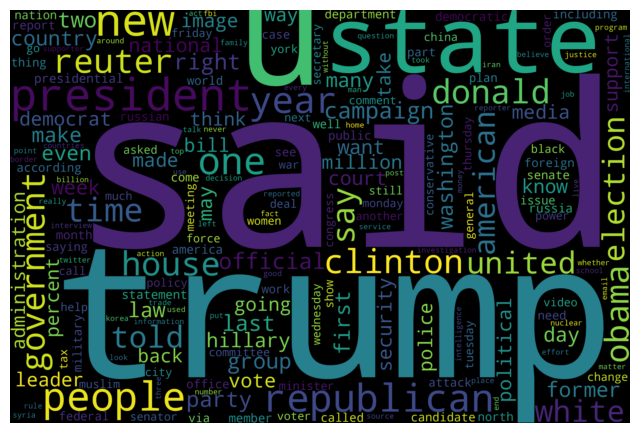

In [23]:
#create data visualisation using wordcloud
content = " ".join(news_data_modified['text'].astype(str))
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='viridis', collocations=False, stopwords=STOPWORDS).generate(content)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Feature engineering

In [24]:
#encode categorical values into numbers
encoded_columns = ['label']
label_encoder = LabelEncoder()
news_data_modified[encoded_columns] = news_data_modified[encoded_columns].apply(lambda col: label_encoder.fit_transform(col) if col.name in encoded_columns else col)

<ipython-input-24-96404ec7ea2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data_modified[encoded_columns] = news_data_modified[encoded_columns].apply(lambda col: label_encoder.fit_transform(col) if col.name in encoded_columns else col)


In [25]:
#select independent variables(X) and target variable(Y)
X = news_data_modified['text'].values
Y = news_data_modified['label'].values

In [26]:
print(X)

['donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year great year america donald j trump realdonaldtrump december trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december one likes calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk include many people hate wonder hate alan sandoval alansand

In [27]:
print(Y)

[0 0 0 ... 1 1 1]


In [28]:
#train test split method
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=42)

In [83]:
#word embedding
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [84]:
#creating the BERT model with text classification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
sentence = "This is a simple example sentence."
tokens = tokenizer(sentence, return_tensors="pt")
outputs = model(**tokens)
last_hidden_state = outputs.last_hidden_state

print("Shape of last hidden state:", last_hidden_state.shape)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Shape of last hidden state: torch.Size([1, 9, 768])


Machine learning models

In [87]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Type of regularization
}

# Create the logistic regression model
log_model = LogisticRegression()

# Create the grid search with cross-validation
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model
best_log_model = grid_search.best_estimator_

# Make predictions on the test set
log_pred = best_log_model.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters:  {'C': 100, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
# Evaluate the model
log_accuracy = accuracy_score(Y_test, log_pred)
print(f'Accuracy: {log_accuracy:.2f}')
log_conf_matrix = confusion_matrix(Y_test, log_pred)
print('Confusion Matrix:')
print(log_conf_matrix)
log_class_report = classification_report(Y_test, log_pred)
print('Classification Report:')
print(log_class_report)

Accuracy: 0.99
Confusion Matrix:
[[7006   38]
 [  32 6331]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7044
           1       0.99      0.99      0.99      6363

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



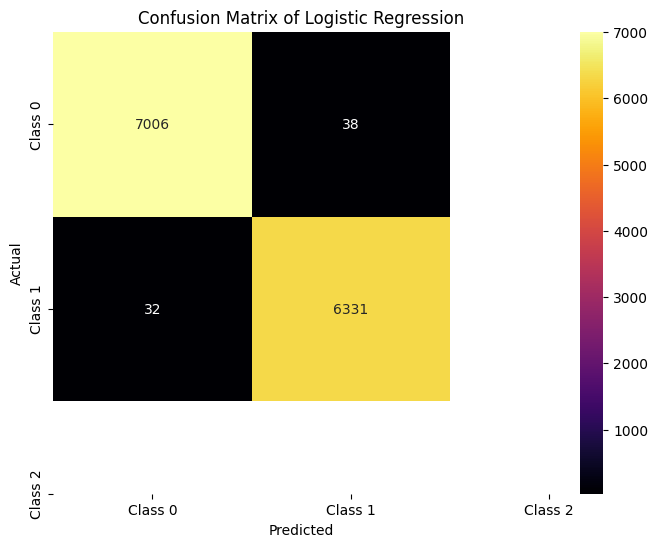

In [137]:
#plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(log_conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

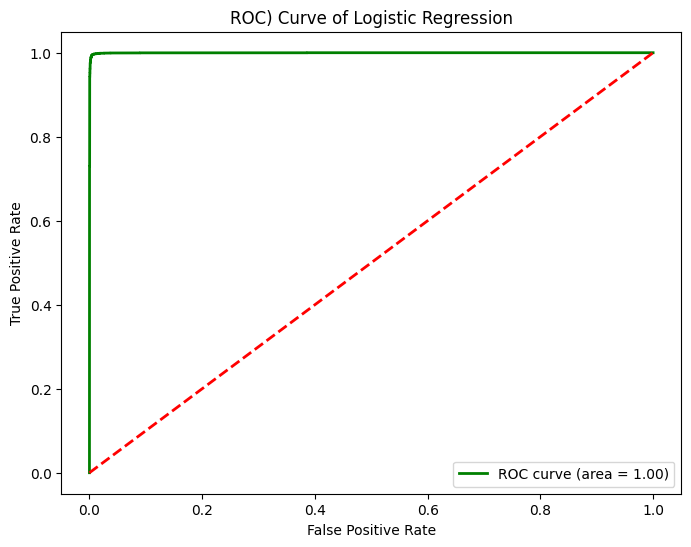

In [138]:
log_prob = best_log_model.predict_proba(X_test_tfidf)[:, 1]
# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(Y_test, log_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC) Curve of Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [89]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Create a Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, Y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best hyperparameters
nb_model_tuned = MultinomialNB(alpha=best_alpha)
nb_model_tuned.fit(X_train_tfidf, Y_train)

# Make predictions and evaluate the tuned model
nb_pred_tuned = nb_model_tuned.predict(X_test_tfidf)
nb_accuracy_tuned = accuracy_score(Y_test, nb_pred_tuned)
nb_conf_matrix_tuned = confusion_matrix(Y_test, nb_pred_tuned)
nb_class_report_tuned = classification_report(Y_test, nb_pred_tuned)

In [90]:
# Print the results
print(f'Best Alpha: {best_alpha}')
print(f'Tuned Model Accuracy: {nb_accuracy_tuned:.2f}')
print('Confusion Matrix (Tuned Model):')
print(nb_conf_matrix_tuned)
print('Classification Report (Tuned Model):')
print(nb_class_report_tuned)

Best Alpha: 0.1
Tuned Model Accuracy: 0.96
Confusion Matrix (Tuned Model):
[[6707  337]
 [ 265 6098]]
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7044
           1       0.95      0.96      0.95      6363

    accuracy                           0.96     13407
   macro avg       0.95      0.96      0.96     13407
weighted avg       0.96      0.96      0.96     13407



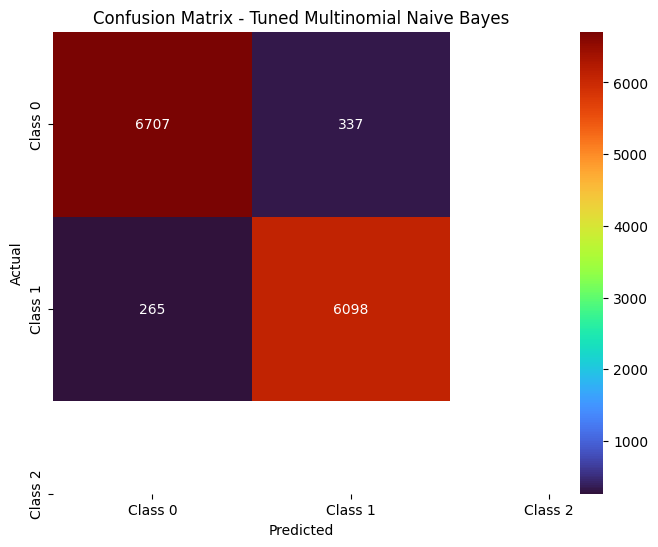

In [95]:
#plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix_tuned, annot=True, fmt='d', cmap='turbo', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Tuned Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

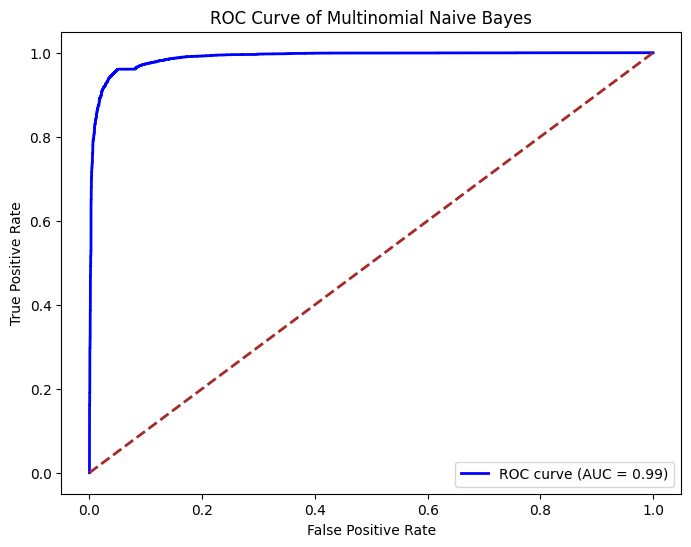

In [104]:
nb_pred_proba_tuned = nb_model_tuned.predict_proba(X_test_tfidf)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, nb_pred_proba_tuned)
# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='brown', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Multinomial Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [106]:
# Define the Decision Tree Classifier
tree_model = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(tree_model, param_grid, cv=2, scoring='accuracy')

# Fit the model with the training data
grid_search.fit(X_train_tfidf, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the final model
best_tree_model = DecisionTreeClassifier(**best_params)
best_tree_model.fit(X_train_tfidf, Y_train)

# Make predictions on the test set
tree_pred = best_tree_model.predict(X_test_tfidf)

# Evaluate the model
tree_accuracy = accuracy_score(Y_test, tree_pred)
tree_conf_matrix = confusion_matrix(Y_test, tree_pred)
tree_class_report = classification_report(Y_test, tree_pred)

In [107]:
# Print the results
print("Best Hyperparameters:", best_params)
print("Accuracy:", tree_accuracy)
print("Confusion Matrix:\n", tree_conf_matrix)
print("Classification Report:\n", tree_class_report)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.9947042589691952
Confusion Matrix:
 [[6989   55]
 [  16 6347]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7044
           1       0.99      1.00      0.99      6363

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



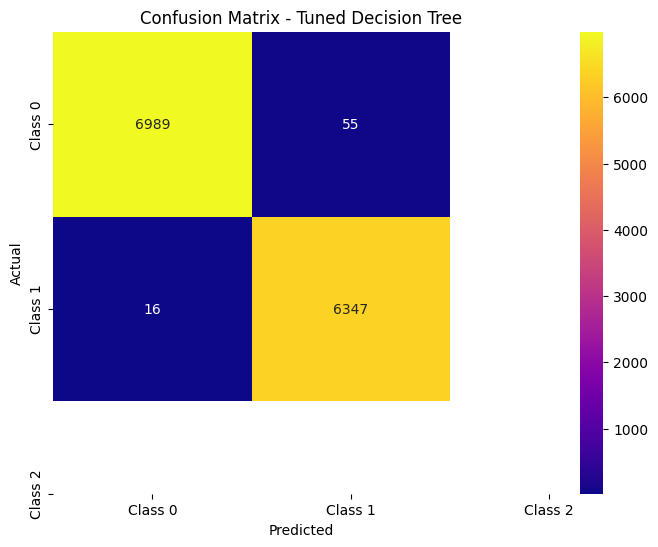

In [136]:
#plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(tree_conf_matrix, annot=True, fmt='d', cmap='plasma', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

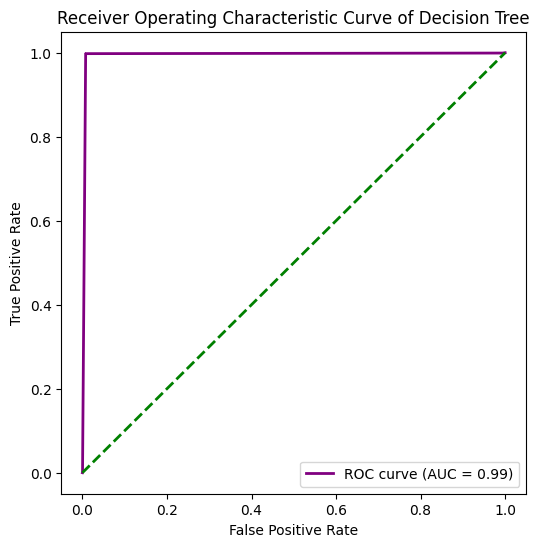

In [135]:
# Get predicted probabilities for the positive class
tree_probabilities = best_tree_model.predict_proba(X_test_tfidf)[:, 1]
# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(Y_test, tree_probabilities)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve of Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [117]:
rf_model = RandomForestClassifier()

# Define a smaller set of hyperparameters and their possible values
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use randomized search with cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=2, scoring=make_scorer(accuracy_score), n_jobs=-1)
random_search.fit(X_train_tfidf, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train_tfidf, Y_train)

# Make predictions on the test set
rf_pred = best_rf_model.predict(X_test_tfidf)

# Evaluate the model
rf_accuracy = accuracy_score(Y_test, rf_pred)
rf_conf_matrix = confusion_matrix(Y_test, rf_pred)
rf_class_report = classification_report(Y_test, rf_pred)

In [118]:
#print the evaluation matrices
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {rf_accuracy:.2f}')
print('Confusion Matrix:')
print(rf_conf_matrix)
print('Classification Report:')
print(rf_class_report)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy: 1.00
Confusion Matrix:
[[7012   32]
 [  12 6351]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7044
           1       0.99      1.00      1.00      6363

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407



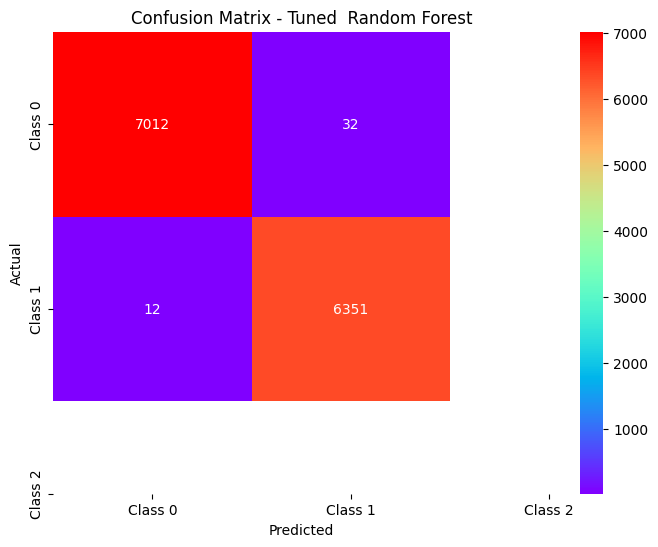

In [134]:
#plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='rainbow', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Tuned  Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

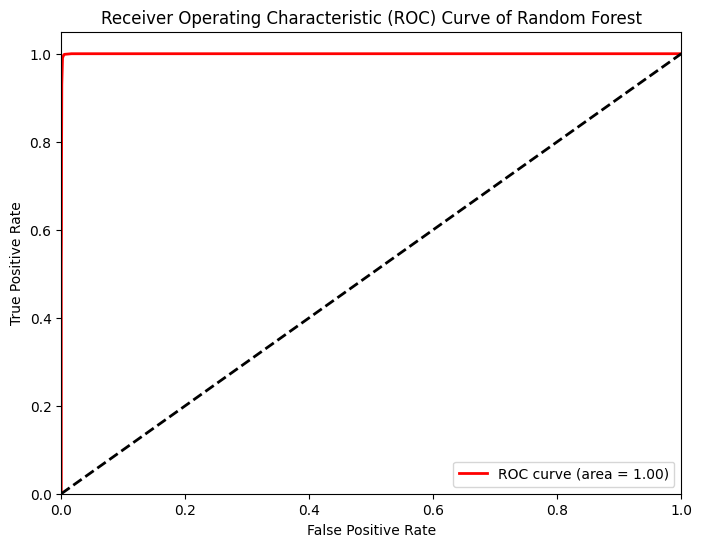

In [133]:
# Get the predicted probabilities for the positive class
rf_probabilities = best_rf_model.predict_proba(X_test_tfidf)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, rf_probabilities)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest')
plt.legend(loc='lower right')
plt.show()

In [125]:
# Define the XGBoost classifier
xgb_model = XGBClassifier()

# Define the hyperparameters grid to search
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=2, scoring='accuracy', random_state=42)
random_search.fit(X_train_tfidf, Y_train)

# Get the best model from the randomized search
best_xgb_model = random_search.best_estimator_

# Fit the best model on the training data
best_xgb_model.fit(X_train_tfidf, Y_train)

# Make predictions on the test set
xgb_pred = best_xgb_model.predict(X_test_tfidf)

# Evaluate the model
xgb_accuracy = accuracy_score(Y_test, xgb_pred)
xgb_conf_matrix = confusion_matrix(Y_test, xgb_pred)
xgb_class_report = classification_report(Y_test, xgb_pred)

In [126]:
#print the results
print("Best XGBoost Parameters:", random_search.best_params_)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)
print("XGBoost Classification Report:\n", xgb_class_report)

Best XGBoost Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
XGBoost Accuracy: 0.9971656597299918
XGBoost Confusion Matrix:
 [[7019   25]
 [  13 6350]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7044
           1       1.00      1.00      1.00      6363

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407



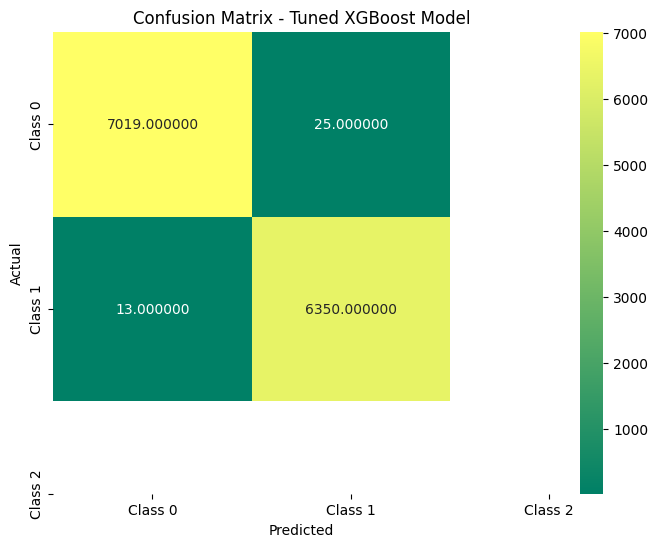

In [147]:
#plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='f', cmap='summer', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Tuned XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

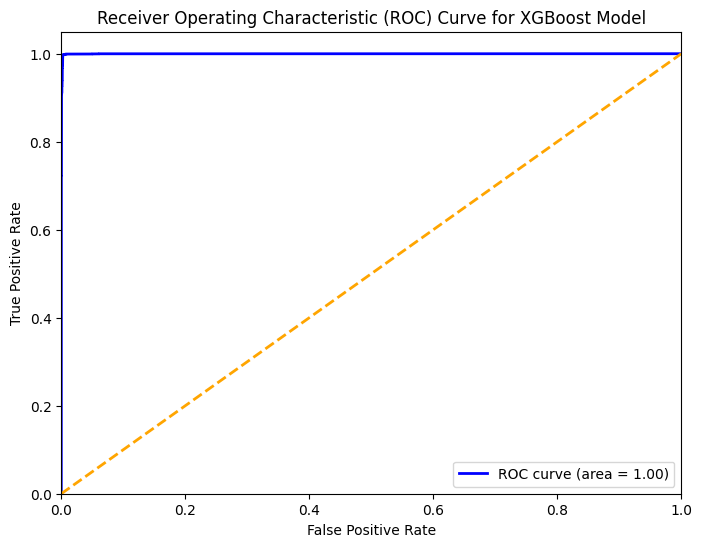

In [132]:
# Get the predicted probabilities for the positive class
xgb_probabilities = best_xgb_model.predict_proba(X_test_tfidf)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, xgb_probabilities)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.show()

CNN model

In [72]:
#build the convolutional neural network model
num_classes = len(np.unique(Y_train))
Y_train_one_hot = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes)

def create_cnn_model(input_dim, output_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=100, input_length=input_length))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [73]:
#text classification and feature selection process
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq)
X_test_padded = pad_sequences(X_test_seq, maxlen=X_train_padded.shape[1])

input_dim = min(tokenizer.num_words, len(tokenizer.word_index) + 1)
output_dim = num_classes
input_length = X_train_padded.shape[1]

model = create_cnn_model(input_dim, output_dim, input_length)

n_splits = 2
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train_padded, Y_train):
    X_train_cv, X_val_cv = X_train_padded[train_index], X_train_padded[val_index]
    Y_train_cv, Y_val_cv = Y_train_one_hot[train_index], Y_train_one_hot[val_index]

    model.fit(X_train_cv, Y_train_cv, epochs=1, batch_size=32, validation_data=(X_val_cv, Y_val_cv))
#print the accuracy score of the stratified k fold
    Y_pred = model.predict(X_test_padded)
    accuracy = accuracy_score(np.argmax(Y_test_one_hot, axis=1), np.argmax(Y_pred, axis=1))
    print(f"Test Accuracy for Fold: {accuracy}")
#print the final accuracy of the model
test_loss, test_accuracy = model.evaluate(X_test_padded, Y_test_one_hot)
print(f"Final Test Accuracy: {test_accuracy}")

419/419 [==============================] - 192s 459ms/step
Test Accuracy for Fold: 0.9991049451778922
419/419 [==============================] - 194s 463ms/step
Test Accuracy for Fold: 0.9993287088834191
419/419 [==============================] - 192s 458ms/step - loss: 0.0029 - accuracy: 0.9993
Final Test Accuracy: 0.9993287324905396


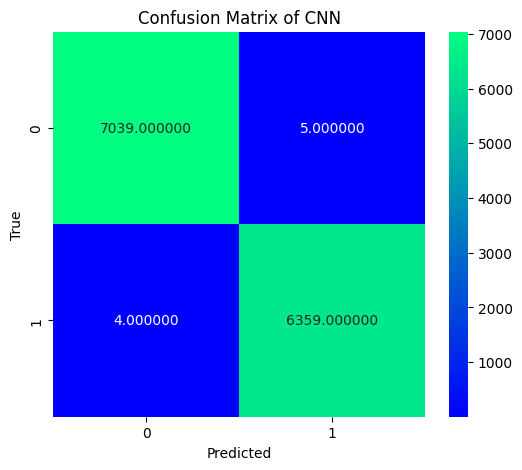

In [154]:
# Convert predicted probabilities to class labels
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_test_labels = np.argmax(Y_test_one_hot, axis=1)
# Confusion Matrix
conf_matrix_cnn = confusion_matrix(Y_test_labels, Y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='f', cmap='winter', xticklabels=np.unique(Y_test_labels), yticklabels=np.unique(Y_test_labels))
plt.title('Confusion Matrix of CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [159]:
# Classification Report of CNN
class_report_cnn = classification_report(Y_test_labels, Y_pred_labels)
print('Classification Report of CNN:\n', class_report_cnn)

Classification Report of CNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7044
           1       1.00      1.00      1.00      6363

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407



Model comparison

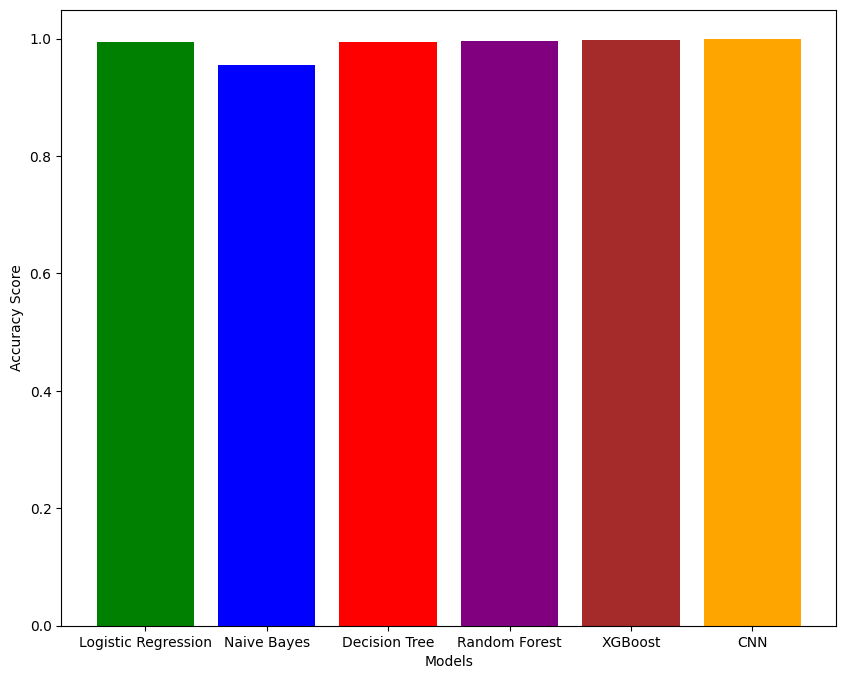

In [142]:
#compare all models using a bar diagram
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'CNN']
accuracy_scores = [log_accuracy, nb_accuracy_tuned, tree_accuracy, rf_accuracy, xgb_accuracy, test_accuracy]
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(models, accuracy_scores, color=['green', 'blue', 'red', 'purple', 'brown', 'orange'])
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
plt.show()